![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

In [4]:
import pandas as pd

# Part 2: Develop Methodology


Before deciding the methodology, somo analysis were done on the text. The data source of this analysis is the file `mental_health_preprocessed.csv`  generated in the pre-processing part.

In [5]:
df = pd.read_csv("data/preprocessing/mental_health_preprocessed.csv")
df.head()

,Unnamed: 0,text,label,text_no_stopwords,text_stem,text_lemma
0,0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,dear american teen question dutch person hear ...
1,1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,noth look forward lifei dont mani reason keep ...,look forward lifei not reason going feel like ...
2,2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommend im look expand playlist usual ...,music recommendation m look expand playlist us...
3,3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done tri feel betterth reason im still aliv...,m try feel betterthe reason m alive know mum d...
4,4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worri year old girl subject domest physicalmen...,worry year old girl subject domestic physicalm...


## 3. Understand the use of methods like Tf-idf

The initial analysis identifies the top 30 features for each class using TF-IDF (Term Frequency-Inverse Document Frequency).  TF-IDF measures the importance of a word within a document relative to the entire corpus, highlighting terms that are frequent in a specific class but less common overall.

In [6]:
# Separate texts based on label
texts_0 = df[df["label"] == 0]["text_lemma"].dropna().tolist()  # Healthy group
texts_1 = df[df["label"] == 1]["text_lemma"].dropna().tolist()  # Mentally ill group

### 3.1. Analyzing using TF-IDF

Getting the first 30 features by class

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply TF-IDF separately for each group
vectorizer_0 = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_0 = vectorizer_0.fit_transform(texts_0)
words_0 = vectorizer_0.get_feature_names_out()
scores_0 = np.asarray(tfidf_0.mean(axis=0)).flatten()

vectorizer_1 = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_1 = vectorizer_1.fit_transform(texts_1)
words_1 = vectorizer_1.get_feature_names_out()
scores_1 = np.asarray(tfidf_1.mean(axis=0)).flatten()

# Create DataFrames with extracted words and scores
df_tfidf_0 = pd.DataFrame({"word": words_0, "score": scores_0}).sort_values(by="score", ascending=False)
df_tfidf_1 = pd.DataFrame({"word": words_1, "score": scores_1}).sort_values(by="score", ascending=False)

Visualizing Results

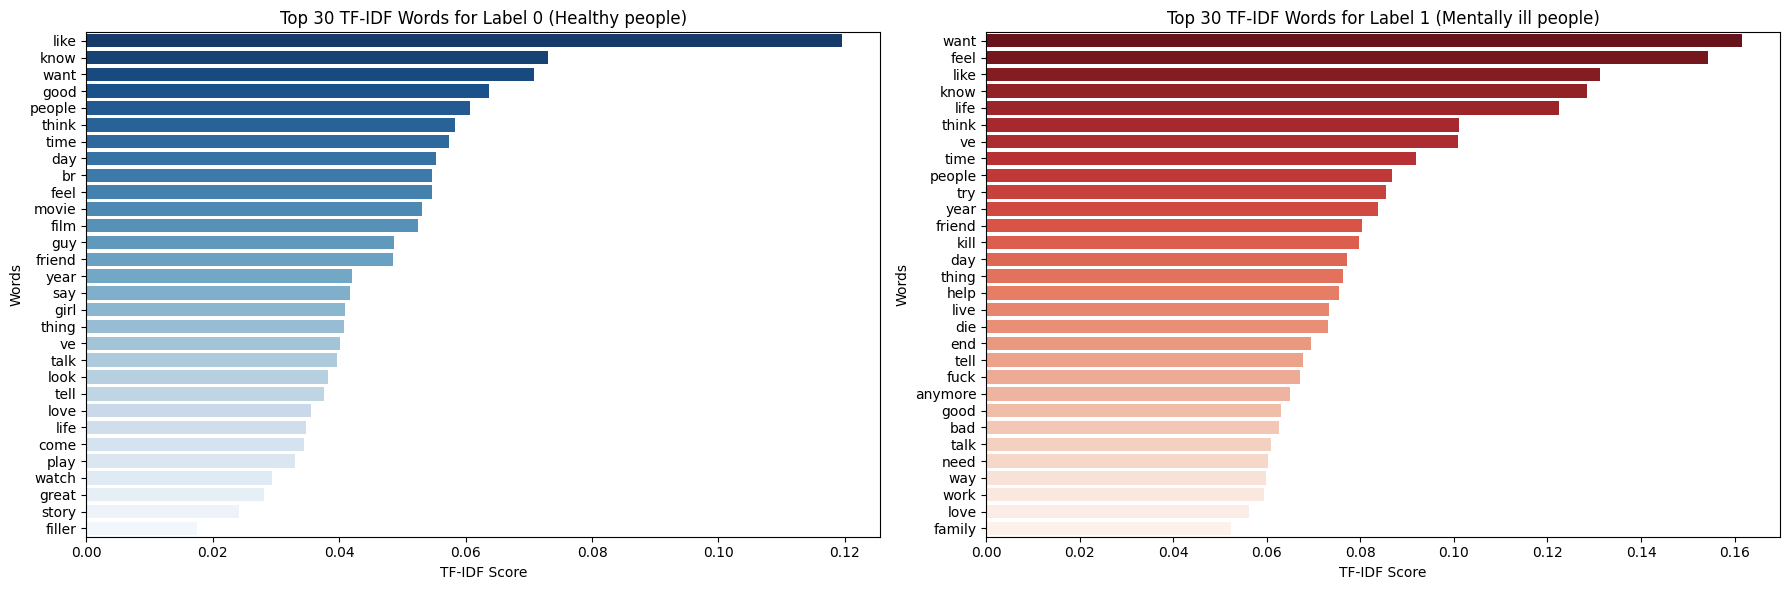

In [8]:
# Plot TF-IDF scores for both labels side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(y=df_tfidf_0["word"], x=df_tfidf_0["score"], hue=df_tfidf_0["word"], dodge=False, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 30 TF-IDF Words for Label 0 (Healthy people)")
axes[0].set_xlabel("TF-IDF Score")
axes[0].set_ylabel("Words")


sns.barplot(y=df_tfidf_1["word"], x=df_tfidf_1["score"], hue=df_tfidf_1["word"], dodge=False, palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 30 TF-IDF Words for Label 1 (Mentally ill people)")
axes[1].set_xlabel("TF-IDF Score")
axes[1].set_ylabel("Words")

plt.tight_layout()
plt.show()

**Analysis of Label 0 (Healthy People)**

The words associated with Label 0 generally carry positive connotations ("good," "love," "great," "life"). This suggests that healthy individuals tend to express positive sentiments and focus on positive aspects of life.

**Analysis of Label 1 (Mentally Ill People)**

The words associated with Label 1 often convey stronger emotions, both positive and negative ("want," "feel," "love," "bad," "fuck"). This suggests a greater emotional expressiveness or a wider range of emotional experiences.
Focus on Internal States: Terms like "want," "feel," "think," and "need" indicate a focus on internal thoughts, feelings, and needs.
Challenges and Difficulties: Words like "bad," "end," and "kill" hint at challenges, struggles, or negative experiences.

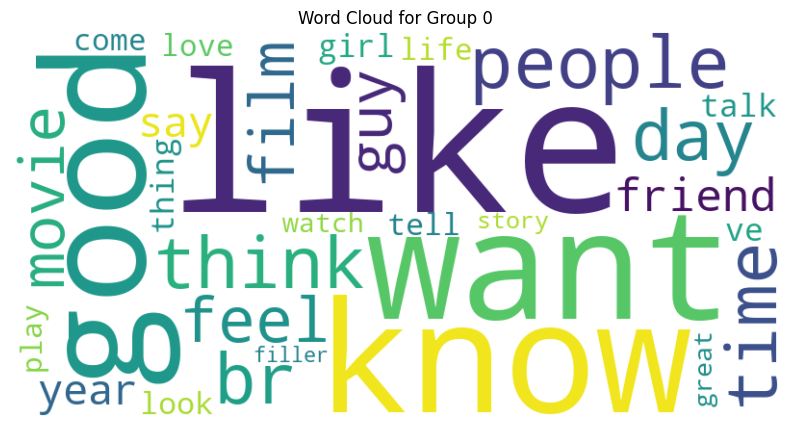

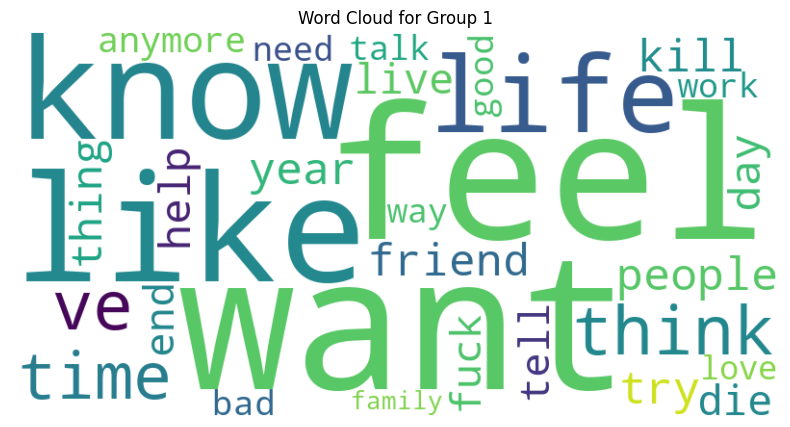

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(df_tfidf, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(
        dict(zip(df_tfidf["word"], df_tfidf["score"]))
    )

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for both groups
generate_wordcloud(df_tfidf_0, "Word Cloud for Group 0")
generate_wordcloud(df_tfidf_1, "Word Cloud for Group 1")

### 3.2. Generating Topics Using LDA

Latent Dirichlet Allocation (LDA) is a technique used in natural language processing to discover topics within a set of documents.  It's a statistical model that assumes each document is a mixture of several topics, and each topic is a mixture of several words.  LDA tries to find these underlying topics by analyzing the words present in the documents

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA separately for each group
vectorizer_0_lda = CountVectorizer(stop_words="english", max_features=1000)
X_0 = vectorizer_0_lda.fit_transform(texts_0)

vectorizer_1_lda = CountVectorizer(stop_words="english", max_features=1000)
X_1 = vectorizer_1_lda.fit_transform(texts_1)

num_topics = 5
lda_model_0 = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_0.fit(X_0)

lda_model_1 = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_1.fit(X_1)

# Extract topic words
words_0_lda = vectorizer_0_lda.get_feature_names_out()
words_1_lda = vectorizer_1_lda.get_feature_names_out()

topics_0 = {}
topics_1 = {}

for topic_idx, topic in enumerate(lda_model_0.components_):
    top_words = [words_0_lda[i] for i in topic.argsort()[:-11:-1]]
    topics_0[f"Topic {topic_idx+1}"] = top_words

for topic_idx, topic in enumerate(lda_model_1.components_):
    top_words = [words_1_lda[i] for i in topic.argsort()[:-11:-1]]
    topics_1[f"Topic {topic_idx+1}"] = top_words

# Convert topics to DataFrame
df_topics_0 = pd.DataFrame(topics_0)
df_topics_1 = pd.DataFrame(topics_1)

# Display results
print("Topics for Label 0 (Healthy people):")
print(df_topics_0)

print("\nTopics for Label 1 (Mentally ill people):")
print(df_topics_1)

Topics for Label 0 (Healthy people):
     Topic 1 Topic 2 Topic 3  Topic 4   Topic 5
0         br    like    like   filler       day
1       film    game    know     post       wan
2      movie    time  friend     fuck        na
3       good    know    feel      guy     water
4       like    look  people   reddit     bored
5  character    want    want     like      talk
6      great    play   think  comment  nowdrink
7      story     say    talk      gay      song
8       time   sleep  school     meme     check
9       love    hour    time     need        dm

Topics for Label 1 (Mentally ill people):
   Topic 1 Topic 2 Topic 3 Topic 4 Topic 5
0     want    feel    life    tell    want
1     know    like    year  friend    life
2     time    want      ve    know    fuck
3     help    know     job    talk  people
4      day   think    work    help     die
5  redflag      ve    like    time    know
6    think    time    time     say    like
7      try     day    live    like    hate
8    

It is interesting like Topic 5 for the "Mentally Ill People" category reveals a cluster of words associated with severe emotional distress, suicidal ideation, anger, hopelessness, and a struggle for understanding and connectio

### 3.3. Generating Topics with n-GRAMS

This code snippet performs n-gram analysis on text data, specifically focusing on identifying the most frequent bigrams (2-word sequences) and trigrams (3-word sequences) within two distinct groups or labels (Label 0 and Label 1).

In [ ]:
# Process n-grams separately for each class
# Label 0 (Healthy people)
vectorizer_ngrams_0 = CountVectorizer(ngram_range=(2, 3), max_features=10000)  # Limit feature size
X_ngrams_0 = vectorizer_ngrams_0.fit_transform(texts_0)
ngrams_counts_0 = X_ngrams_0.sum(axis=0).A1
ngrams_counts_df_0 = pd.DataFrame({'ngram': vectorizer_ngrams_0.get_feature_names_out(), 'count': ngrams_counts_0}).sort_values(by='count', ascending=False)

# Label 1 (Mentally ill people)
vectorizer_ngrams_1 = CountVectorizer(ngram_range=(2, 3), max_features=10000)  # Limit feature size
X_ngrams_1 = vectorizer_ngrams_1.fit_transform(texts_1)
ngrams_counts_1 = X_ngrams_1.sum(axis=0).A1
ngrams_counts_df_1 = pd.DataFrame({'ngram': vectorizer_ngrams_1.get_feature_names_out(), 'count': ngrams_counts_1}).sort_values(by='count', ascending=False)

ngrams_counts_df_1.head(20)

Top N-grams for Label 1:
                 ngram  count
1939         feel like   6219
5900          not know   1736
9165          want die   1580
6050          not want   1460
9925          year old    978
2894             go to    904
2956       good friend    853
9108            wan na    756
9855          year ago    755
9271         want kill    752
9039            ve try    751
7721  suicidal thought    693
9294         want live    668
9616          will not    647
3447       high school    636
2573           get bad    627
9193          want end    597
1581          end life    556
5020         long time    539
5665         need help    536


,ngram,count
1939,feel like,6219
5900,not know,1736
9165,want die,1580
6050,not want,1460
9925,year old,978
2894,go to,904
2956,good friend,853
9108,wan na,756
9855,year ago,755
9271,want kill,752


The n-grams strongly reinforce the themes of emotional distress, suicidal ideation, and the need for help that were likely observed in the TF-IDF and topic modeling steps. N-grams provide crucial context that individual words lack.1 For example, "want" by itself might not be significant, but "want die" clearly indicates suicidal ideation.   

Now LDA is applied on n-grams to generate some topics.

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA with a limited vocabulary size
num_topics = 5  # Define number of topics

lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(X_ngrams_1)

# Extract top words for each topic
def get_top_words(model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_features
    return topics

# Get top words per topic
topics_dict = get_top_words(lda_model, vectorizer_ngrams_1.get_feature_names_out(), n_top_words=10)

# Convert to DataFrame
topics_df = pd.DataFrame(topics_dict)

topics_df


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,feel like,not want,suicidal thought,wan na,good friend
1,make feel,not know,year old,go to,year ago
2,life feel,want die,not know,high school,commit redflag
3,feel bad,will not,good friend,ve try,feel like
4,get bad,want live,year ago,year old,long time
5,time feel,want kill,high school,end life,month ago
6,want feel,die want,feel like,video game,year old
7,suicidal thought,not care,year ve,get bad,ve try
8,know feel,not stop,know go,get well,ve get
9,mental health,know not,want kill,go kill,go to


## 4. Decide on what type of content you want to track and how.

Following data analysis, it is recommended implementing tracking of keywords and n-grams indicative of suicidal ideation and self-harm. 

## 5. Make your expectations explicit. Why would one care to track the type of vocabulary in your corpus? What interesting questions could be answered with this?

This will allow us to proactively identify and support individuals who may be at risk